# Probability & Large Numbers

### Peter Onyisi
<img src="images/texas_logo.png" width="400" align="left"/>

Some rules of probability:
* numbers described by probability distributions can be _discrete_ (e.g., the result of throwing a six-sided die is an integer between 1 and 6) or _continuous_ (e.g., the height of a randomly chosen UT student could be any real number in a certain range).  In either case the total probability must be one: either the sum of the probability of all options (discrete) or the integral of the probabilities (continuous).
* for a continuous probability distribution on a variable $x$, the probability density function $P(x)$ should be interpreted as: the probability of finding $x$ to be in a range $[x_0, x_0+\Delta x]$ is $P(x_0) \Delta x$ (in the limit that $\Delta x \to 0$).
* if there are multiple independent events, the probabilities multiply. So if I have two dice, the probability of getting two on the first and three on the second is $(1/6)\times(1/6) = 1/36$.
* the total probability of multiple exclusive possibilities to happen is the sum of the probabilities for each. So the probability of getting a four or five on a throw of one die is $1/6 + 1/6 = 1/3$.

When analyzing the random walk, we found that the width of the distribution of final positions (as described by the standard deviation) increased with $\sqrt{N}$. We will find this kind of square root behavior to be very common in statistical systems.

Let's imagine throwing a (potentially biased) coin which will come up heads with probability $p$ (and hence tails with probability $1-p$). If we toss the coin $N$ times, we expect that it should come up heads $Np$ times "on average," though it might happen more or fewer times, and the ratio $N_{heads}/N$ should be $p$. Let's run some simulations and see.

In [1]:
# some standard setup stuff
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 16
import numpy
from math import sqrt
import math
import random

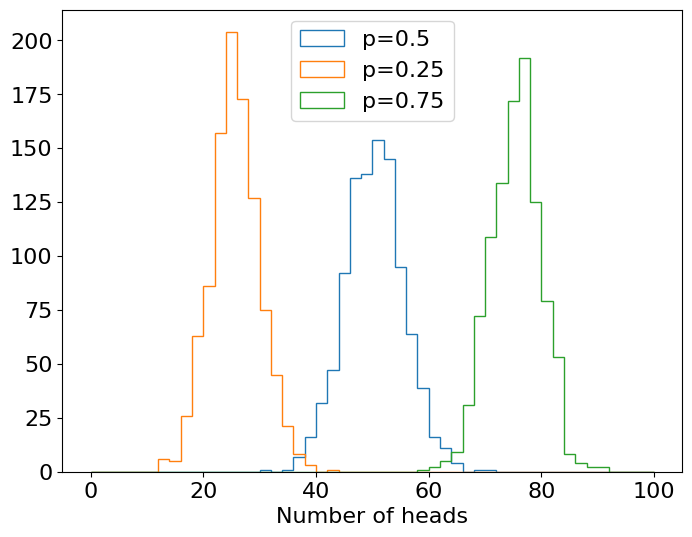

In [2]:
# make a function to produce simulation runs
# takes the following parameters:
# N = number of coin tosses for each sample
# p = probability of heads
# Nsamples = number of samples to run
# the return value is a list with Nsamples entries, where each entry is the number of heads in that run
# if you were a *good* programmer you would check to make sure inputs are valid, etc.! but scientists tend
# to get to the point and assume the user knows what they're doing
def run_simulations(N, p, Nsamples):
    # initialize result
    result = []
    for sample in range(Nsamples):
        heads = 0
        for flip in range(N):
            # the following generates a random number from 0 to 1, so is true with probability p
            if random.random() < p:
                # add one
                heads += 1
        result.append(heads)
    # transform to a numpy array to make it easier to do some calculations later
    return numpy.array(result)

# 100 flips, fair coin (p=0.5), 1000 samples
samples_fair = run_simulations(100, 0.5, 1000)
# 100 flips, coin biased to tails (p=0.25), 1000 samples
samples_low_p = run_simulations(100, 0.25, 1000)
# 100 flips, coin biased to hads (p=0.75), 1000 samples
samples_high_p = run_simulations(100, 0.75, 1000)

plt.figure(figsize=(8,6))
plt.hist(samples_fair, range=(0,100), bins=50, histtype='step', label='p=0.5')
plt.hist(samples_low_p, range=(0,100), bins=50, histtype='step', label='p=0.25')
plt.hist(samples_high_p, range=(0,100), bins=50, histtype='step', label='p=0.75')
plt.legend()
plt.xlabel('Number of heads')
plt.show()

So indeed the means are where we expect them (25, 50, 75) and there is some spread around the peaks, but it's pretty clear that getting only 25 heads from a fair coin ($p=0.5$) is unlikely. The fraction of heads gives us a way to estimate $p$:

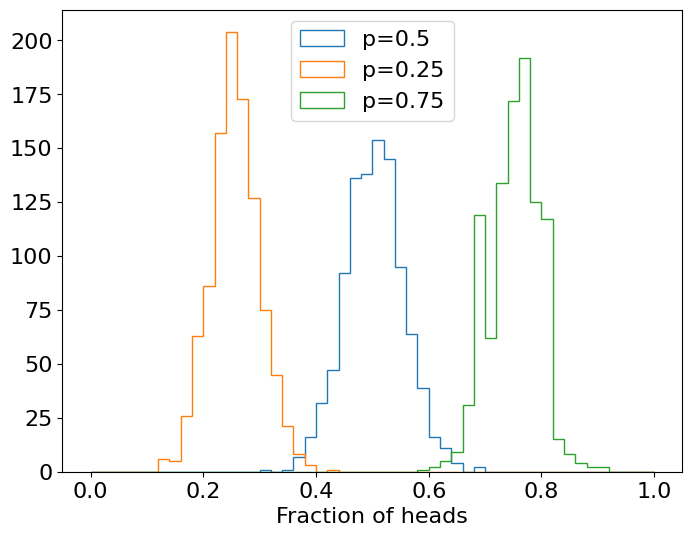

In [3]:
plt.figure(figsize=(8,6))
# samples_fair/100. returns a new array where every element is divided by 100
plt.hist(samples_fair/100, range=(0,1), bins=50, histtype='step', label='p=0.5')
plt.hist(samples_low_p/100, range=(0,1), bins=50, histtype='step', label='p=0.25')
plt.hist(samples_high_p/100, range=(0,1), bins=50, histtype='step', label='p=0.75')
plt.legend()
plt.xlabel('Fraction of heads')
plt.show()

What happens to the fraction of heads if we flip the coin more times?

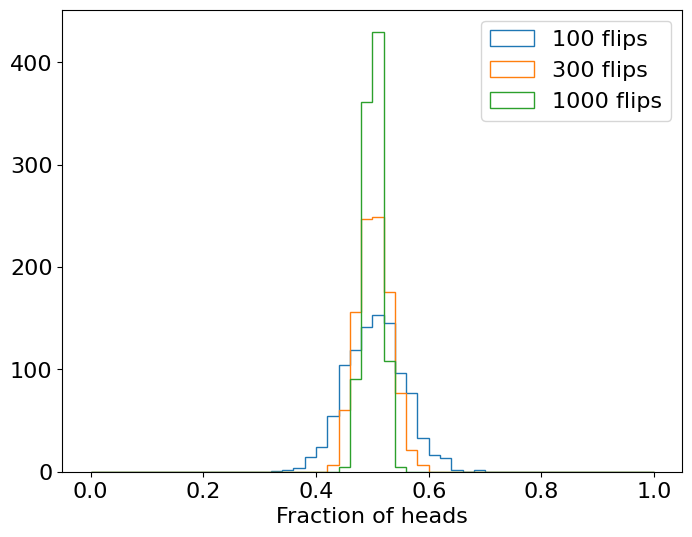

In [4]:
# 100 flips, fair coin (p=0.5), 1000 samples
samples_100 = run_simulations(100, 0.5, 1000)
# 300 flips, coin biased to tails (p=0.25), 1000 samples
samples_300 = run_simulations(300, 0.5, 1000)
# 1000 flips, coin biased to hads (p=0.75), 1000 samples
samples_1000 = run_simulations(1000, 0.5, 1000)

plt.figure(figsize=(8,6))
plt.hist(samples_100/100, range=(0,1), bins=50, histtype='step', label='100 flips')
plt.hist(samples_300/300, range=(0,1), bins=50, histtype='step', label='300 flips')
plt.hist(samples_1000/1000, range=(0,1), bins=50, histtype='step', label='1000 flips')
plt.legend()
plt.xlabel('Fraction of heads')
plt.show()

So the width of the distribution is gets narrower as the number of flips increases. How does this work? The standard deviation of the _number of heads_ increases $\propto \sqrt{N}$ (we will discuss the exact proportionality later). But the standard deviation of the _fraction of heads_ is that number divided by $N$, which means that it changes $\propto \sqrt{N}/N = 1/\sqrt{N}$. Let's see how the standard deviation of the fraction of heads changes with the number of flips.

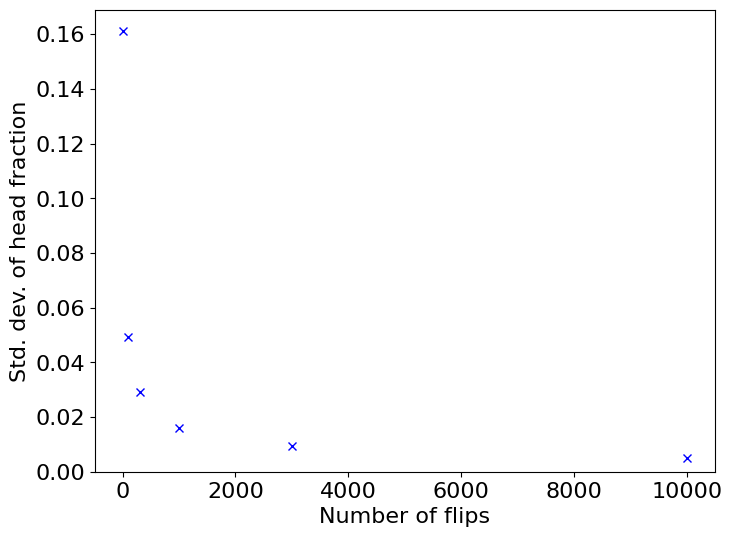

In [5]:
Nflips = [10,100, 300, 1000, 3000, 10000]
results = []
for nflip in Nflips:
    samples = run_simulations(nflip, 0.5, 1000)
    # get fraction of heads
    samples = samples / nflip
    # numpy has a convenient function to compute standard deviations. 
    # ddof=1 specifies to use N-1 in the standard deviation denominator instead of N.
    stddev = numpy.std(samples, ddof=1)
    results.append(stddev)

plt.figure(figsize=(8,6))
plt.plot(Nflips, results, 'bx')
plt.xlabel('Number of flips')
plt.ylabel('Std. dev. of head fraction')
# fix minimum y
plt.ylim(0)
plt.show()

The standard deviation decreases with $N$. 

Coin flips are an example of a kind of process called a _Bernoulli process_. These follow the following rules:
* there is some number $N$ of "trials";
* each trial has two possible outcomes (1 and 0, "success" and "failure", "heads" and "tails", etc.)
* the probability of success in each trial is a constant number $p$,
* the outcome of each trial is independent of all previous trials.
The probability distribution of observing $k$ successes given $N$ trials and a success probability $p$ is called the _binomial distribution_. It is a discrete probability distribution (you cannot observe 1.7 heads when you flip coins). The exact value is given by

$$ B(k; N, p) = \left(\begin{array}{c} N\\k\end{array}\right) p^k (1-p)^{N-k} = \frac{N!}{k!(N-k)!} p^k (1-p)^{N-k}$$
Let's unpack this. We want to know the probability to get $k$ successes in $N$ trials. Those $k$ successes could come in any possible order - they could all be at the beginning of the $N$ trials, at the end, or somewhere in between - and and the number  The term 

$$\left(\begin{array}{c} N\\k\end{array}\right) = \frac{N!}{k!(N-k)!}$$ 

tells us how many ways there are of choosing which $k$ of the $N$ trials are successes. Each of those potential orderings has a probability 

$$p^k (1-p)^{N-k}$$

to happen: each of the $k$ successes had a probability $p$ to happen, and each of the $N-k$ failures had a probability $1-p$ to happen, so the probability of the sequence of occurrences (since each trial is independent) is the product of all the probabilities.

It can be shown that the standard deviation of the binomial distribution is $\sqrt{Np(1-p)}$ - as mentioned above, it is proportional to $\sqrt{N}$, with the proportionality constant $\sqrt{p(1-p)}$. Therefore the standard deviation of the *fraction* of successes is $\sqrt{Np(1-p)}/N = \sqrt{p(1-p)/N}$. Let's confirm this:

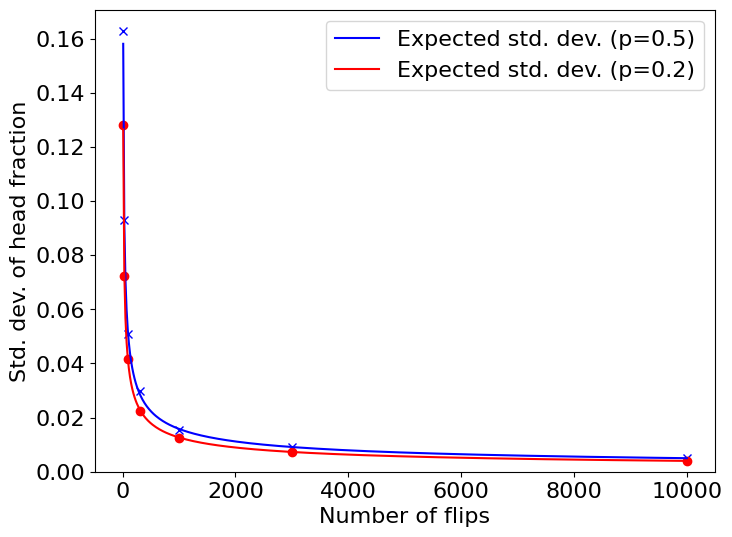

In [6]:
Nflips = [10, 30, 100, 300, 1000, 3000, 10000]
results_fair = []
results_biased = []
for nflip in Nflips:
    samples_fair = run_simulations(nflip, 0.5, 1000)
    samples_biased = run_simulations(nflip, 0.2, 1000)
    # get fraction of heads
    samples_fair = samples_fair / nflip
    samples_biased = samples_biased / nflip
    # numpy has a convenient function to compute standard deviations. 
    # ddof=1 specifies to use N-1 in the standard deviation denominator instead of N.
    stddev_fair = numpy.std(samples_fair, ddof=1)
    stddev_biased = numpy.std(samples_biased, ddof=1)
    results_fair.append(stddev_fair)
    results_biased.append(stddev_biased)

plt.figure(figsize=(8,6))
plt.plot(Nflips, results_fair, 'bx')
plt.plot(Nflips, results_biased, 'ro')
xpoints = numpy.linspace(10, 10000, 500)
plt.plot(xpoints, numpy.sqrt(0.5*0.5/xpoints), 'b', label='Expected std. dev. (p=0.5)')
plt.plot(xpoints, numpy.sqrt(0.2*0.8/xpoints), 'r', label='Expected std. dev. (p=0.2)')
plt.xlabel('Number of flips')
plt.ylabel('Std. dev. of head fraction')
# fix minimum y
plt.ylim(0)
plt.legend()
plt.show()

We see that there are very large variations of the values of the variables being plotted. We can visualize the data better with a "log-log" plot, where we change the axes so equal distance along the axis corresponds to equal change in the logarithm of the variable (not the variable itself):

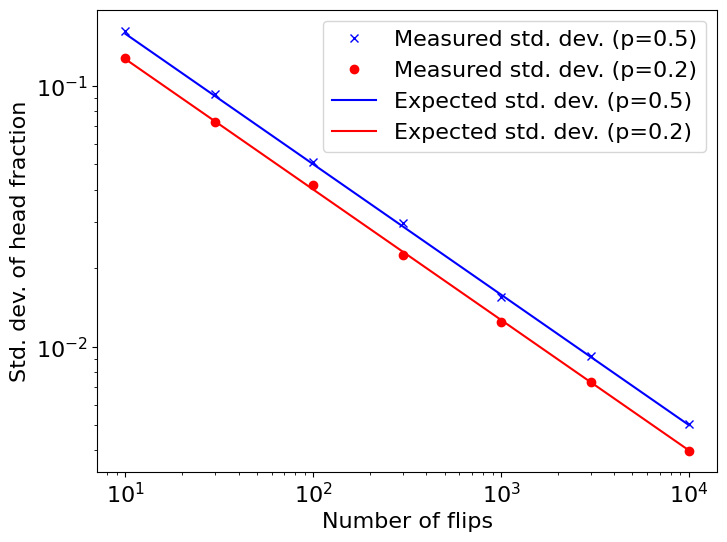

In [7]:
plt.figure(figsize=(8,6))
plt.plot(Nflips, results_fair, 'bx', label='Measured std. dev. (p=0.5)')
plt.plot(Nflips, results_biased, 'ro', label='Measured std. dev. (p=0.2)')
xpoints = numpy.linspace(10, 10000, 500)
plt.plot(xpoints, numpy.sqrt(0.5*0.5/xpoints), 'b', label='Expected std. dev. (p=0.5)')
plt.plot(xpoints, numpy.sqrt(0.2*0.8/xpoints), 'r', label='Expected std. dev. (p=0.2)')
plt.xlabel('Number of flips')
plt.ylabel('Std. dev. of head fraction')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

So we learn that we can get arbitrarily small standard deviation on the measured fraction of successes in a Bernoulli process - i.e., arbitrarily small error on the estimate of the true probability of success $p$ - by having enough trials.

It will not have escaped your notice that the distribution of successes in a Bernoulli process (after being histogrammed) looks like a normal distribution, i.e.

$$ B(k; N, p) \approx \mathcal{N}(k; Np, \sqrt{Np(1-p)}) $$
where the mean of the normal distribution is $Np$ and the standard deviation is $\sqrt{Np(1-p)}$. Let's compare a simulation, the exact binomial result, and a normal distribution. 

When computing the binomial distribution, we note that $n!$ can be a _very_ large number, and that we wind up dividing one large number by other large numbers to get a not-so-large number. We can take logarithm of the very large numbers and make them more tractable:

$$ B(k; N, p) = \frac{N!}{k!(N-k)!}p^k (1-p)^{N-k} = \exp\left(\ln N! - \ln k! - \ln (N-k)! + k\ln p + (N-k) \ln (1-p)\right) $$
There is a result called Stirling's Formula which gives us 

$$\ln N! \approx N \ln N - N + \frac{1}{2}\ln 2\pi N$$ 
which we can use for computation.

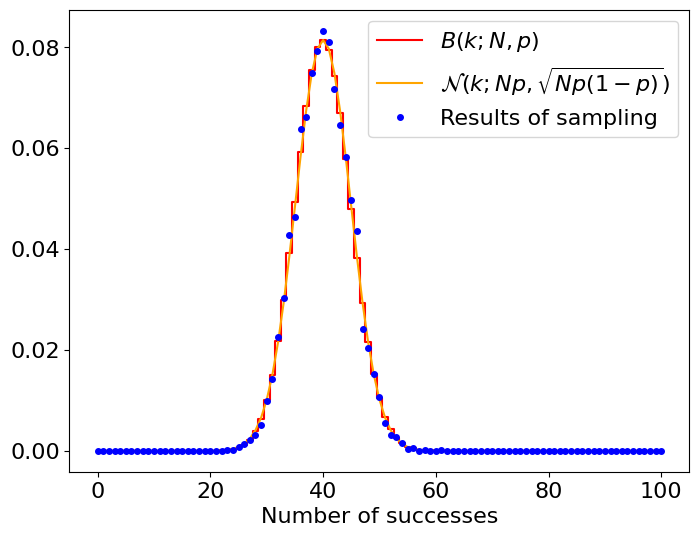

In [8]:
# define a binomial distribution function (for illustration, use scipy.stats.binom for real work)
def binomial_distribution(k, N, p):
    return numpy.exp(stirling(N) - stirling(k) - stirling(N-k) + k*numpy.log(p) + (N-k)*numpy.log(1-p))
    
# return Stirling's approximation for log x! - gets better at high x, but even for x=1 it is correct to 0.081 
def stirling(x):
    # numpy.log is natural log
    # x should be an integer. replace 0 by 1, since log 0! = log 1!; maximum can be whatever
    xnew = numpy.clip(x, 1, None)
    return xnew*numpy.log(xnew)-xnew+0.5*numpy.log(2*math.pi*xnew)

# define a normal distribution function (for illustration)
def normal_distribution(x, mu, sigma):
    return 1/(numpy.sqrt(2*math.pi)*sigma)*numpy.exp(-numpy.square((x-mu)/sigma)/2)

# slightly unfair coin
samples = run_simulations(100, 0.4, 10000)
xpoints = numpy.array(list(range(0,101)))
binomial = binomial_distribution(xpoints, 100, 0.4)
# we will make the histogram in numpy first (which gives the array of heights in each bin and the bin edges)
h = numpy.histogram(samples, range=(-0.5, 100.5), bins=101, density=True)
plt.figure(figsize=(8,6))
plt.step(xpoints, binomial, 'r', where='mid', label='$B(k; N, p)$')
plt.plot(xpoints, normal_distribution(xpoints, 0.4*100, sqrt(100*0.4*0.6)), color='orange', 
         label=r'$\mathcal{N}(k; Np, \sqrt{Np(1-p)})$')
plt.plot(xpoints, h[0], 'bo', label='Results of sampling', markersize=4)
plt.xlabel('Number of successes')
plt.legend()
plt.show()

### Main Points

   * Although the detailed outcome of any given random process is impossible to predict, certain properties of the process can be predicted. For example, the detailed sequence of results of a fair coin flip can't be guessed ahead of time, but it is a good prediction that given enough flips the fraction of heads will be around 50%.
   * Often these predictions get better as the number of steps of the random process increases. For a Bernoulli process, the standard deviation of the fraction of successes varies proportionally to $1/\sqrt{N}$; as $N$ gets larger, the measured fraction of successes is less likely to deviate from the success probability $p$. (This is a variant of what is called the *law of large numbers.*) To be clear, _any given process_ might potentially deviate strongly from this prediction; all the law of large numbers says is that you are extremely unlikely to encounter it.